In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from scipy.optimize import curve_fit as cf
%config InlineBackend.figure_format='retina'
#%matplotlib inline
plt.rcParams['figure.figsize'] = [6,6]


"""
Change the font size globally

""" 
ft_l = 20; ft_m =18; ft_s = 16
params = {'legend.fontsize': ft_s,
         'axes.labelsize': ft_l,
         'axes.titlesize':ft_l,
         'xtick.labelsize':ft_m,
         'ytick.labelsize':ft_m}
matplotlib.rcParams.update(params)
#print(matplotlib.rcParams)

# Problem 5 - Solving the time-dependent Heat Equation with finite difference methods


#### Imagine an insulated iron rod that only exchanges heat with its surroundings at each end.  Consider the length of the rod to be 1 m for simplicity.  One end of the rod is fixed at room temperature (300 K) and the other end is immersed in hot oil (500 K) and immediately equilibrates at that temperature.  

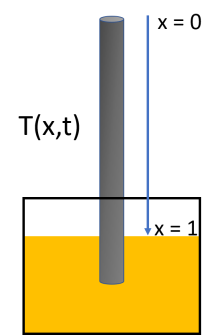

In [2]:
from PIL import Image
im = Image.open("rod.png")
display(im)

The $\textbf{heat equation}$ describes the process of heat diffusion, i.e., how the spatial distribution of temperature in a material changes as a function of time.  The temperature distribution $T(x ⃗,t)$ is a scalar field on  $x ⃗=(x,y,z)$ coordinates and changes with time $t$.  The heat equation for a homogeneous material is

$$cρ\frac{\partial T(x ⃗,t)}{\partial t}=K_0 ∇^2 T(x ⃗,t)+Q(x ⃗,t)$$ 

where $c$,$ρ$, and $K_0$ are the heat capacity, mass density, and thermal conductivity of the rod material, respectively.  In the absence of a heat source $Q$, the equation in one-dimension simplifies to

$$\frac{\partial T}{\partial t}=α\frac{\partial^2 T}{\partial x^2}$$

where $α$ is a constant dependent on the aforementioned material properties.  

In order to model the temperature distribution within the rod using numerical methods, we will discretize the rod into even-length segments and compute the temperature at the nodes to satisfy the boundary value problem.  Let $N$ be number of nodes, and $N-1$ be the number of segments rod. 


##  Parts a - c
(a)  Assuming that the rod is made of iron, look up the value and units of $α$ for iron online.  Is the differential equation that defines the system dimensionally consistent (i.e., are the units the same on both sides of the equation)?

(b)  What is the initial temperature distribution within the rod (i.e., $T(x ⃗,t=0)$)?  

(c)  What are the boundary value conditions? 

*You may want to check out some online resources for getting some intuition on this physics if you have not encountered transport phenomena before. Two references are given below. You do not need to understand everything for answering this question.*

*A video from 3blue1brown: https://www.youtube.com/watch?v=ToIXSwZ1pJU*

*Some derivation notes: https://tutorial.math.lamar.edu/classes/de/theheatequation.aspx*

### Answer


(a) The constants have the following dimensions: 
$$ c \sim J K^{-1}kg^{-1}$$
 $$ \rho \sim kgm^{-3}$$
 $$ K_0 \sim W m^{-1}K^{-1}$$
 Equation dimension on both sides : $Wm^{-3}$
 
The thermal diffusivity constant for iron is about: 
$$\alpha \approx 2.3 \times 10^{-5} m^2s^{-1}$$

(b) Initial profile: 
$$ T(x, t =0) = 300 K$$

(c) Boundary conditions:
$$ T(x=0, t) = 300 K$$
 $$ T(x=1, t) = 500 K$$

## Parts d and e
(d) Start with $N=6$ (labeled 0 to 5). Denote the temperatures at each node as $T_i(t)$. Write expressions for $\frac{\partial^2 T}{\partial x^2}$ for the internal nodes 1 to 4 using the first-centered difference.  Write similar expressions using the first forward difference for node 0 at the end of the rod in the air ($x=0$), and the first backward difference for node 5 at the end of the rod in the hot oil ($x=1$ $m$).  Write your solution as a matrix M such that 

$$\frac{\partial^2 T}{\partial x^2} = M \vec{T}$$


(e) Define a function Laplacian_1D that generates the $M = \frac{\partial^2 }{\partial x^2}$ matrix for an arbitrary number of $N$ nodes. Verify that it works by generating the discrete datapoints of a known function  $y = \sin(2\pi x)$and compare $M\vec{T}$ to its the analytical second-order derivative in a plot. Demonstrate your function works for a $N>40$.

### Answer

Use central difference for the interior points ($ i = 1,2,3,4$): 
$$ \frac {\partial^2 }{ \partial x^2}T_i = \frac{1}{\Delta x^2} \left( 1T_{i-1} - 2T_{i} + 1 T_{i+1} \right) $$

As the left boundary does not have point on its left, use forward difference: 
$$ \frac {\partial^2 }{ \partial x^2}T_0 = \frac{1}{\Delta x^2} \left( 2T_{0} - 5T_{1} + 4 T_{2} - T_{3}\right) $$

As the right boundary does not have point on its right, use backward difference: 
$$ \frac {\partial^2 }{ \partial x^2}T_0 = \frac{1}{\Delta x^2} \left( - T_{N-3}+ 4 T_{N-2}- 5T_{N-1}+ 2T_{N}   \right) $$

Matrix form: 
$$ \frac {\partial^2 }{ \partial x^2} 
\begin{pmatrix}
 T_0 \newline
 T_1 \newline
 T_2 \newline
 T_3 \newline
 T_4 \newline
 T_5 \newline
\end{pmatrix}=\frac{1}{\Delta x^2} \begin{pmatrix}
 2 & -5 & 4& -1&  0 & 0\newline
  1& -2 & 1 & 0 & 0&  0\newline
  0 & 1& -2&  1 & 0 & 0\newline
  0 & 0 & 1& -2&  1 & 0\newline
  0 & 0 & 0 & 1& -2 & 1\newline
  0 & 0 &-1 & 4& -5 & 2\newline
\end{pmatrix} 
\begin{pmatrix}
 T_0 \newline
 T_1 \newline
 T_2 \newline
 T_3 \newline
 T_4 \newline
 T_5 \newline
\end{pmatrix}
$$

In [3]:
def Laplacian_1D(N):
    M = np.zeros((N,N));
    
    for i in range(1, N-1):
            M[i,i] = -2
            M[i,i-1] = 1
            M[i,i+1] =1
            
    M[0,0] = 2; M[0,1] = -5;M[0,2] = 4; M[0,3] = -1;
    M[N-1,-1] = 2; M[N-1,-2] = -5;M[N-1,-3] = 4; M[N-1,-4] = -1;
    dx = 1/(N-1)
    M /= dx**2
    
    return M

In [4]:
print(Laplacian_1D (6)*0.2**2)

[[ 2. -5.  4. -1.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  1. -2.  1.]
 [ 0.  0. -1.  4. -5.  2.]]


In [5]:
def f(x):
    return np.sin(2*np.pi*x)
def g(x):
    return -4*np.pi**2*np.sin(2*np.pi*x)

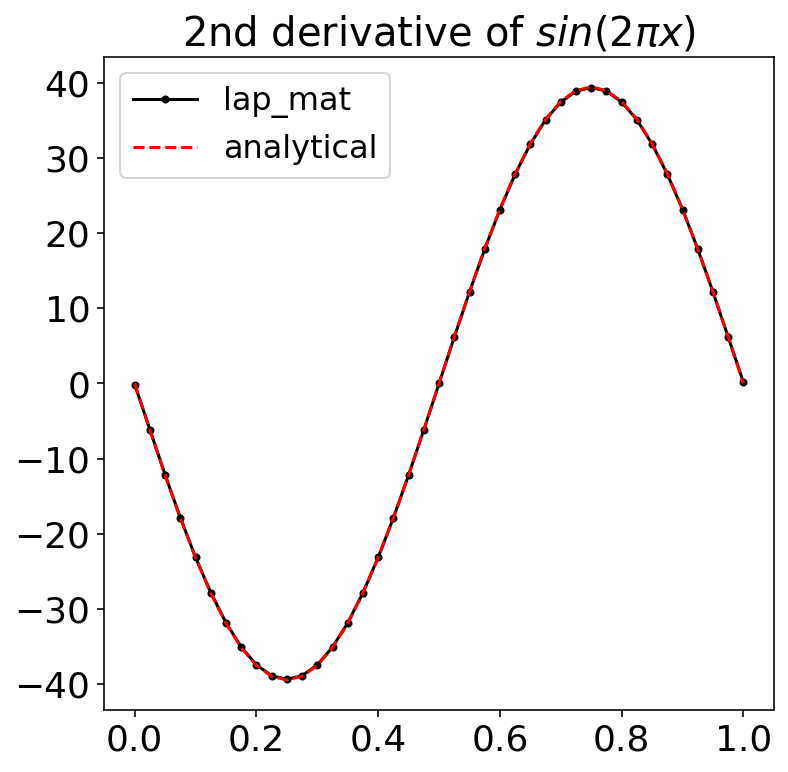

In [6]:
N=41
A = Laplacian_1D(N)
xvec = np.linspace(0,1,N)
y = f(xvec)
res = np.matmul(A, y)
plt.plot(xvec, res, '-k', marker = '.',label = 'lap_mat')
plt.plot(xvec,g(xvec), '--r', label = 'analytical')
plt.title ("2nd derivative of $sin(2\pi x)$")
plt.legend()

## Parts f and g
(f)	Using this Laplacian operator that you have defined, we can compute the right-hand side for any temperature profile at any point in time. Here we will handle the evolution in time by integrating using a forward-Euler method (note that in practice, the Crank-Nicolson algorithm is more common).  Please look at Chapter 30 in C&C for how this is done (Section 30.2 on explicit methods and equations 30.2-30.5) and write your own function for solving the heat equation.  You can fill in the framework we provided or write your own integrator.

(g) Solve the system with $N=41$ nodes and a time step of $dt = 1.0$ $s$ and integrate up to $3$ $hrs$.  Present your result as an overlay of plots of the temperature profile $T$ versus $x$ for every $20$ $min$.

### Answer f

In [7]:
# Define your initial profile function
def f0 (x):
    y = np.ones(len(x))*300
    return y


def solveHeat (init_f,xrange = [0,1], T_bc = [0,0],N = 41,t_tot = 1, dt = 1.0, print_time = 1200,alpha = 2.3E-5):
    # Discretize the space
     
    x_vec = np.linspace(xrange[0], xrange[1], N)
    T_vec = np.zeros(len(x_vec))
    dx = (xrange[1] - xrange[0])/(N-1)
    
    # Set the initial temperature profile
    T_vec = init_f(x_vec)
    T_vec[0] = T_bc[0]
    T_vec[-1] = T_bc[1]
    
    # Compute the Laplacian operator and save in A
    A = Laplacian_1D (N)
    
    
    # The number of total computation steps
    
    n_steps = int (t_tot/dt)
    print_steps = np.int (print_time/dt)
    
    
    results=[]
    snap_time = []
    
    # Record the inital profile
    results.append(np.copy (T_vec))
    snap_time.append(0)
    
    step = 1
    while (step <= n_steps):
    
        # Your code here to do forward Eurler integration
        T_vec += alpha* dt*np.matmul (A, T_vec)
        
        
        # Your code here to enforce the boundary condition
        T_vec[0] = T_bc[0]
        T_vec[-1] = T_bc[1]
        
        # Record the results every print_steps
        if (step%print_steps ==0):
            results.append(np.copy (T_vec))
            snap_time.append(step*dt)
            
        step +=1
    
    # Convert list to np.array
    results = np.asarray(results)
    snap_time = np.asarray(snap_time)
    
    return results, snap_time

### Answer

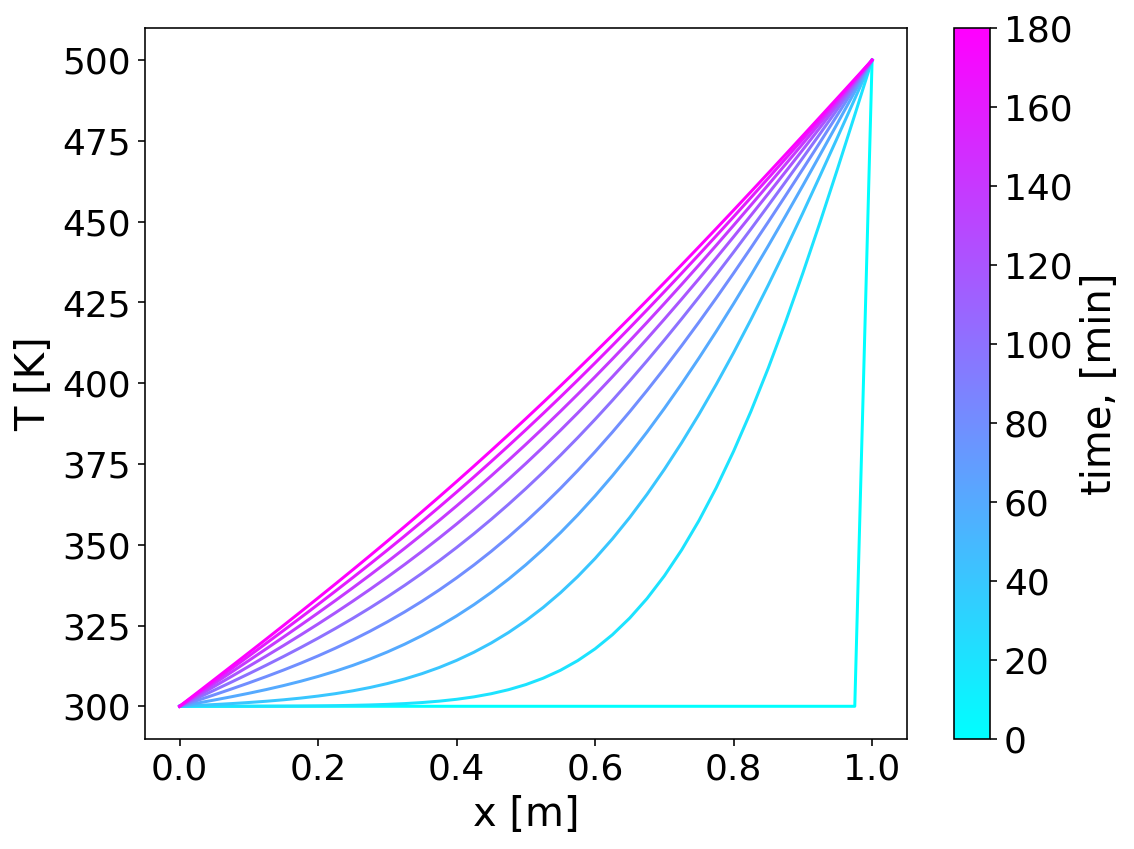

In [8]:
print_time = 20*60 # print every 20 minutes
t = print_time*9 # 3 hours/20 minutes = 9

dt = 1.0
T_bc = [300,500]
N = 41
alpha = 2.3E-5 
xrange = [0,1]
y,time = solveHeat (f0,xrange = xrange, T_bc = T_bc,N = N,t_tot = t, dt = dt, print_time = print_time, alpha = alpha)

fig, ax = plt.subplots(figsize = (8,6))

# Let's make a nice color bar
from matplotlib import cm
cmap = plt.get_cmap('cool', len(time)) 

x = np.linspace(xrange[0], xrange[1], N)
for i in range (y.shape[0]):
    tlabel = str (int (time[i]/60) )+"min"
    ax.plot(x, y[i,:], label = tlabel, c = cmap(i))
#ax.legend (loc='center', bbox_to_anchor=(1.25,0.5))

norm = matplotlib.colors.Normalize(vmin=0, vmax=time[-1]/60) 
sm = cm.ScalarMappable(cmap='cool', norm=norm) 
sm.set_array([]) 
  
fig.colorbar(sm, label= "time, [min]", ticks= time/60) 

ax.set_xlabel ("x [m]")
ax.set_ylabel ("T [K]")
plt.tight_layout()

## Parts h-j
(h) According to the definitions in Ch&C Ch.30, what is the $\lambda$ value for the time step we used?  Show on a plot what happens if you choose a time step that is too large.  What is the max time step we can use without causing an instability in the solution? 

(i) The steady state is reached when $ \frac{\partial T}{\partial t} = 0 $.  What is the steady-state solution to the heat equation?  Solve using either your own shooting method code or scipy.integrate.solve_bvp.

(j) Does the system reach the steady state in 5 hrs? Plot the temperature at $x=0.5$ $m$ versus time.  Indicate the steady-state value with a horizontal line, and calculate the percentage of difference from the steady state at $t=5$ $hrs$.

### Answer (h)

By definition: 
$$ \lambda = \alpha \frac{\Delta t}{\Delta x^2}$$
In our setup, 
$$ \lambda = 2.3\times 10^{-5}m^2s^{-1} \frac{1 s}{0.025^2 m^2} = 0.0368$$

This satifies
$$ \lambda \leq \frac{1}{2}$$
And therefore it is stable. 
For this to hold: 

$$ dt_{max} = \frac{1/2}\alpha \Delta x^2 = 13.6 s$$

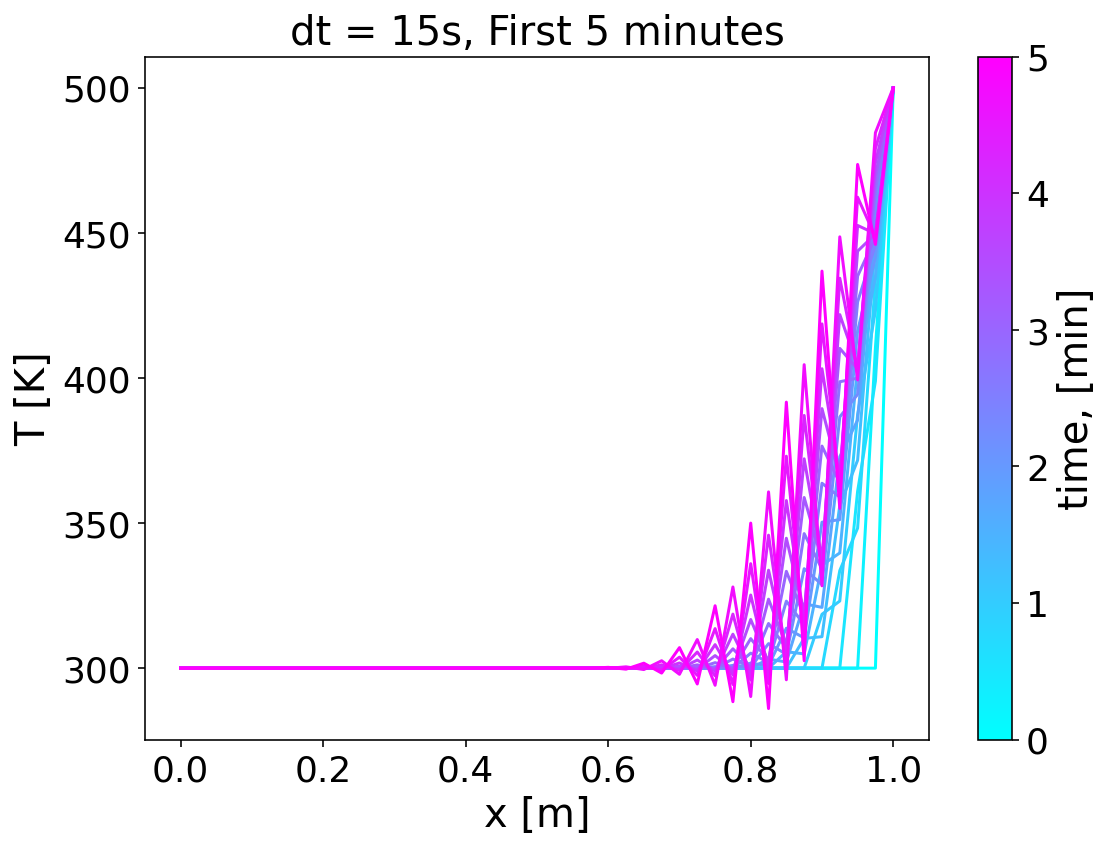

In [9]:
print_time = 15 # print every 15 seconds
t = print_time*5*4 # the first 8 minutes

dt = 15.0
T_bc = [300,500]
N = 41
alpha = 2.3E-5 
xrange = [0,1]
y,time = solveHeat (f0,xrange = xrange, T_bc = T_bc,N = N,t_tot = t, dt = dt, print_time = print_time, alpha = alpha)

fig, ax = plt.subplots(figsize = (8,6))

# Let's make a nice color bar
from matplotlib import cm
cmap = plt.get_cmap('cool', len(time)) 

x = np.linspace(xrange[0], xrange[1], N)
for i in range (y.shape[0]):
    tlabel = str (int (time[i]/60) )+"min"
    ax.plot(x, y[i,:], label = tlabel, c = cmap(i))
#ax.legend (loc='center', bbox_to_anchor=(1.25,0.5))

norm = matplotlib.colors.Normalize(vmin=0, vmax=time[-1]/60) 
sm = cm.ScalarMappable(cmap='cool', norm=norm) 
sm.set_array([]) 
  
fig.colorbar(sm, label= "time, [min]", ticks= time[0::4]/60) 

ax.set_xlabel ("x [m]")
ax.set_ylabel ("T [K]")
ax.set_title ("dt = 15s, First 5 minutes")
plt.tight_layout()

#### Wow, this looks wild. This is definitely instability! 
So the higher spatial resolution we want (e.g. smaller dx values), the smaller time steps we need to take. And more computational time will be needed. 

### Answer (i)

The steady state equation is: 
$$ \frac{d^2T}{dx^2} = 0 $$
Note that the PDE is reduced to a 2nd order ODE. 
Integrate once: 
$$ \frac{d^2T}{dx^2} = c_1$$
Integrate once more: 
$$ T(x) = c_1 x+ c_2$$
Plug in boundary conditions: 

$$ T(0) = c2 =300 $$ 


$$ T(1) = c1 + c2 =500 $$
This gives: 
$$ T(x) = 200 x+ 300$$

Numerically, this can be solved by converting it to a sytem of two coupled first order equations on variables $[y, \frac{dy}{dt}]$:

$$
\frac{d}{dt}\begin{pmatrix}
y \newline
y'
\end{pmatrix}
=\begin{pmatrix}
y' \newline
0
\end{pmatrix}
$$

**Please pay attention to how it is defined in solve_bvp**

In [10]:
from scipy.integrate import solve_bvp

In [11]:
def f_bvp (x,y):
    return np.vstack((y[1], np.zeros(len (y[0]))) )
"""
# Boundary conditions are inplemented in a "constraint-like" manner

ya[0] means the y at x= 0
ya[1] means the y' at x= 0
yb[0] means the y at x= 1
yb[1] means the y' at x= 1

The bc function should specify what is zero. So the constants are substracted. 
"""
def f_bc(ya, yb):
    return np.array([ya[0]-300, yb[0]-500])

Text(0.5, 1.0, 'Steady state')

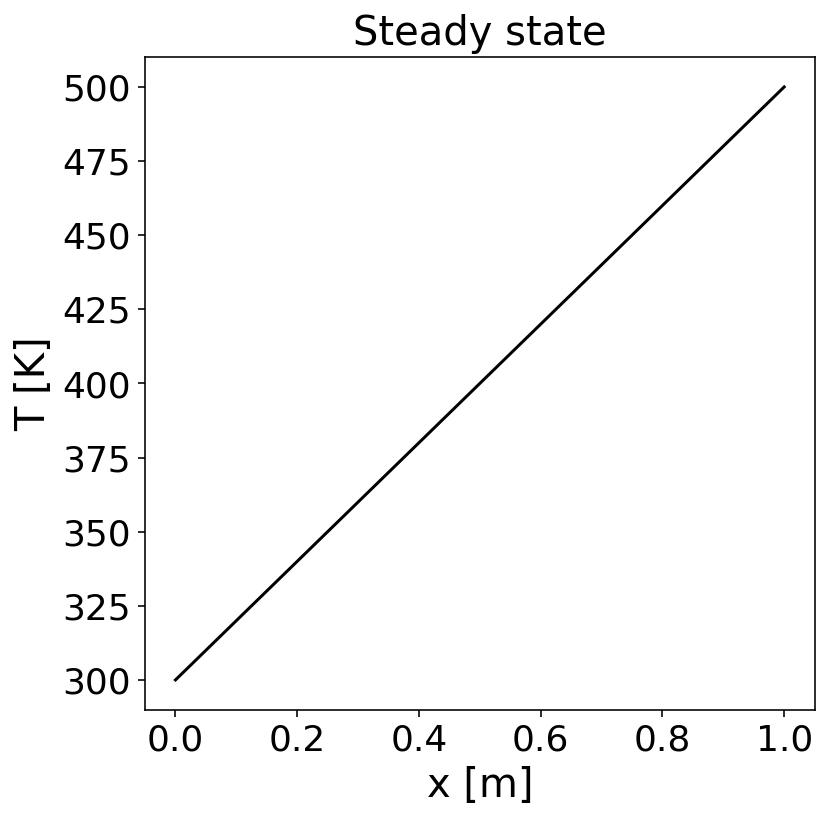

In [12]:
x = np.linspace(xrange[0], xrange[1], N)
y0 = np.zeros((2, N)) # 2 equations, N points
res = solve_bvp(f_bvp, f_bc, x, y0)
plt.plot(res.x, res.y[0], color = 'k')
plt.xlabel ("x [m]")
plt.ylabel ("T [K]")
plt.title("Steady state")

### Answer j

397.8577840032469
 The solution is 0.54% away from steady state value


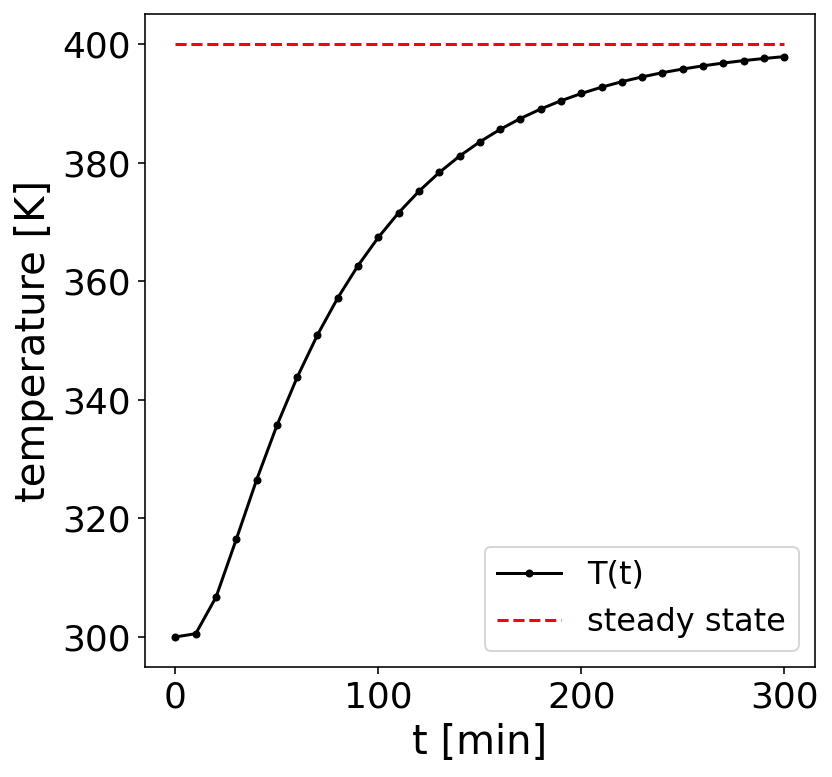

In [13]:
print_time = 10*60
t = print_time*30
dt = 1.0
T_bc = [300,500]
N = 41
alpha = 2.3E-5 
xrange = [0,1]
y,time = solveHeat (f0,xrange = xrange, T_bc = T_bc,N = N,t_tot = t, dt = dt, print_time = print_time, alpha = alpha)

x_vec = np.linspace(0, 1, N)
idx = np.argmin (np.abs(x_vec-0.5))
plt.plot( time/60, y[:,idx], '.-k', label = 'T(t)')
plt.xlabel("t [min]")
plt.ylabel("temperature [K]")
plt.hlines(400, 0,300, color='r', ls ='--', label = 'steady state')
plt.legend(loc = 'lower right')
print(y[-1,idx])
print(" The solution is %.2f%% away from steady state value" % ((400-y[-1,idx])/400*100 ))

## Parts k and l
The function solve_heat can be easily modified to incorporate external heat source. Please modify a few lines of the code you wrote before and model the temperature change in the following problem: 
In an industrial process, an 1 m long rod is heated at the center by a torch. The function $Q (x)$ is constant in time and approximated by a Gaussian with a spread of $0.05$:
$$ \frac {Q (x)}{c\rho} = 0.5 \exp \left[-\frac{1}{2} \left(\frac{x-0.5}{0.05}\right)^2 \right]$$
$\textbf{Assume that the two ends of the iron rod are kept at 300 K for this question.} $

(k) Please solve for the temperature profile for the first 60 min of heating. 

(l) You want to bend the iron bar when it reaches a temperature of $\text{600 K}$ at the center.  How long does it take to reach this condition? 

### Answer k

In [14]:
def heat_source(x, sig = 0.05):
    return 0.5*np.exp(-0.5*((x-0.5)/sig)**2)
    #return 0.0*x

In [15]:
def solveHeat2 (init_f,xrange = [0,1], T_bc = [0,0],N = 41,t_tot = 1, dt = 1.0, print_time = 1200,alpha = 2.3E-5):
    # Discretize the space
     
    x_vec = np.linspace(xrange[0], xrange[1], N)
    T_vec = np.zeros(len(x_vec))
    dx = (xrange[1] - xrange[0])/(N-1)
    
    # Set the initial temperature profile
    T_vec = init_f(x_vec)
    T_vec[0] = T_bc[0]
    T_vec[-1] = T_bc[1]
    
    # Compute the Laplacian operator and save in A
    A = Laplacian_1D (N)
    
    
    # The number of total computation steps
    
    n_steps = int (t_tot/dt)
    print_steps = np.int (print_time/dt)
    
    
    results=[]
    snap_time = []
    
    # Record the inital profile
    results.append(np.copy (T_vec))
    snap_time.append(0)
    
    step = 1
    while (step <= n_steps):
    
        # Your code here to do forward Eurler integration
        T_vec += alpha* dt*np.matmul (A, T_vec) + dt*heat_source(x_vec)
        
        
        # Your code here to enforce the boundary condition
        T_vec[0] = T_bc[0]
        T_vec[-1] = T_bc[1]
        
        # Record the results every print_steps
        if (step%print_steps ==0):
            results.append(np.copy (T_vec))
            snap_time.append(step*dt)
            
        step +=1
    
    # Convert list to np.array
    results = np.asarray(results)
    snap_time = np.asarray(snap_time)
    
    return results, snap_time

In [16]:
print_time = 600
t = print_time*6

dt = 1.0
T_bc = [300,300]
N = 101
alpha = 2.3E-5 
xrange = [0,1]
y,time = solveHeat2 (f0,xrange = xrange, T_bc = T_bc,N = N,t_tot = t, dt = dt, print_time = print_time, alpha = alpha)

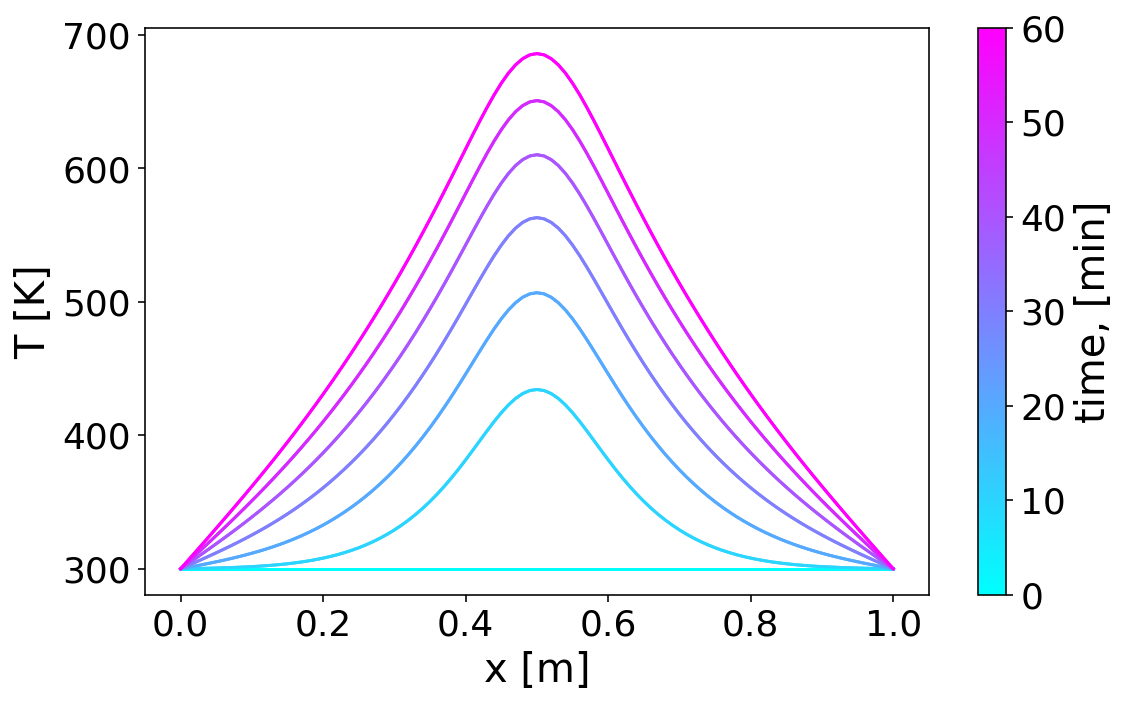

In [17]:
fig, ax = plt.subplots(figsize = (8,5))

from matplotlib import cm

evenly_spaced_interval = np.linspace(0, 1, len(time))
colors = [cm.cool(x) for x in evenly_spaced_interval]

x = np.linspace(xrange[0], xrange[1], N)
for i in range (y.shape[0]):
    tlabel = str (int (time[i]/60) )+"min"
    ax.plot(x, y[i,:], label = tlabel, color = colors[i])


cmap = plt.get_cmap('cool', len(time)) 

x = np.linspace(xrange[0], xrange[1], N)
for i in range (y.shape[0]):
    tlabel = str (int (time[i]/60) )+"min"
    ax.plot(x, y[i,:], label = tlabel, c = cmap(i))
#ax.legend (loc='center', bbox_to_anchor=(1.25,0.5))

norm = matplotlib.colors.Normalize(vmin=0, vmax=time[-1]/60) 
sm = cm.ScalarMappable(cmap='cool', norm=norm) 
sm.set_array([]) 
  
fig.colorbar(sm, label= "time, [min]", ticks= time/60) 


ax.set_xlabel ("x [m]")
ax.set_ylabel ("T [K]")
plt.tight_layout()

### Answer i

686.0723444062511
Time is: 38.0 minutes


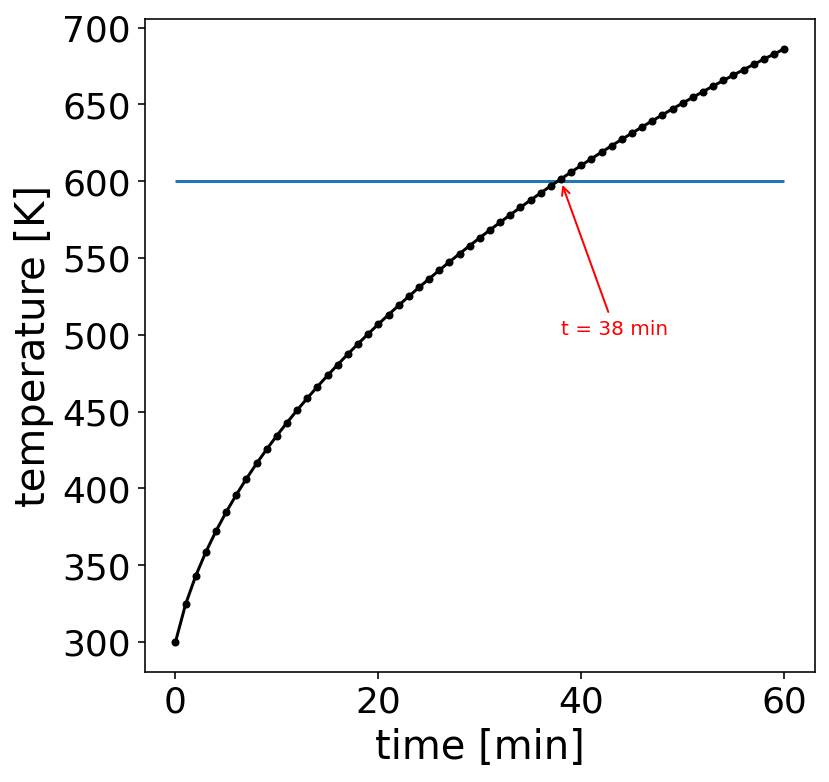

In [18]:

print_time = 60
t = print_time*60
dt = 1.0
T_bc = [300,300]
N = 101
alpha = 2.3E-5 
xrange = [0,1]
y,time = solveHeat2 (f0,xrange = xrange, T_bc = T_bc,N = N,t_tot = t, dt = dt, print_time = print_time, alpha = alpha)
x_vec = np.linspace(0, 1, N)
# Extract temperature at the center
idx = np.argmin (np.abs(x_vec-0.5))

fig, ax = plt.subplots()
ax.plot( time/60, y[:,idx], '.-k')

ax.hlines(600, 0,60)
ax.set_xlabel("time [min]")
ax.set_ylabel("temperature [K]")


print(y[-1,idx])
y2 =  y[:,idx]
idx2 = np.argmin (np.abs(y2-600))
t2 = time[idx2]/60
ax.annotate( "t = 38 min", xy = (t2,600),xytext=(t2, 500),arrowprops=dict(arrowstyle="->", color ='r'), color ='r')

print ("Time is:", t2, "minutes")

### Although we didn't ask...
The steady state is also numerically solvable! (when analytical solution is hard)
And this will tell us the maximal temperature possible in the rod. 

The max temperature is: 926.80 K


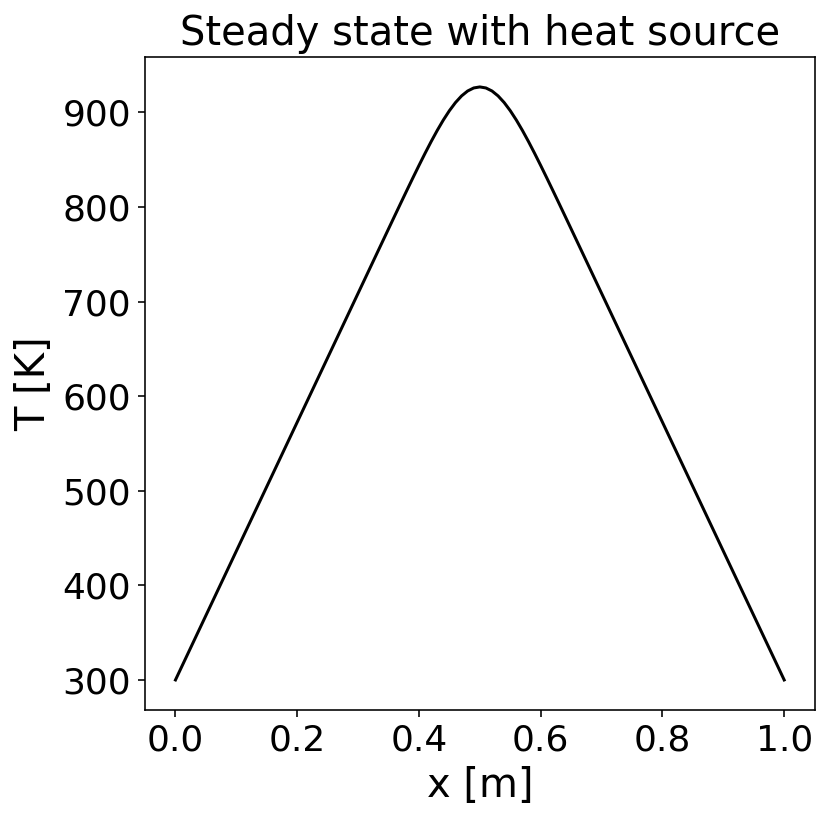

In [19]:
alpha = 2.3E-5 
def f_bvp (x,y):
    sig = 0.05
    return np.vstack((y[1], -0.5*np.exp(-0.5*((x-0.5)/sig)**2)/alpha ))
def f_bc(ya, yb):
    return np.array([ya[0]-300, yb[0]-300])

x = np.linspace(xrange[0], xrange[1], N)
y0 = np.zeros((2, x.size))
res = solve_bvp(f_bvp, f_bc, x, y0)
plt.plot(res.x, res.y[0], '-k')
plt.xlabel ("x [m]")
plt.ylabel ("T [K]")
plt.title("Steady state with heat source")
print ("The max temperature is: %.2f K" % max (res.y[0] ))